# Predicción de Velocidad de Recesión usando la Ley de Hubble

## Descripción del proyecto
Este notebook tiene como objetivo entrenar un modelo de **regresión lineal** para predecir la **velocidad de recesión** de supernovas tipo Ia en función de su **distancia** en megaparsecs, basándose en la **Ley de Hubble**. Utilizamos datos simulados que contienen las columnas de **magnitud aparente** y **redshift**, los cuales se transforman en distancias y velocidades para el análisis. El modelo predice la velocidad de recesión a partir de la distancia, evaluando la precisión con métricas objetivas.

## Estructura del Notebook
1. **Carga y procesamiento de datos:** Se carga un archivo CSV con las columnas necesarias. Los datos se procesan para convertir la magnitud aparente y el redshift en **distancia** y **velocidad de recesión**.
2. **Separación de datos:** Los datos se dividen en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%) para evaluar el modelo.
3. **Entrenamiento del modelo:** Se entrena un modelo de **regresión lineal** utilizando el conjunto de datos de entrenamiento.
4. **Evaluación del modelo:** Se calcula el **Mean Squared Error (MSE)** y el **R^2** para evaluar la precisión del modelo sobre los datos de prueba.
5. **Visualización de resultados:** Se grafican los datos de prueba y las predicciones del modelo, mostrando la relación entre la distancia y la velocidad.

## Aprendizaje esperado
Al finalizar este notebook, los usuarios aprenderán a:
- Cargar y procesar un conjunto de datos astronómicos simulados.
- Dividir los datos en conjuntos de entrenamiento y prueba para evaluar la calidad de un modelo.
- Entrenar y evaluar un **modelo de regresión lineal** utilizando métricas como el **MSE** y el **R^2**.
- Interpretar y visualizar los resultados de un modelo de regresión lineal, comparando los valores reales con los predichos.


In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Cargar el dataset simulado (suponiendo que está en un archivo CSV)
# El archivo debe contener las columnas 'magnitud_aparente' y 'redshift'
data = pd.read_csv('data/dataset_hubble.csv')

# Definir la magnitud absoluta de las supernovas tipo Ia
M_absoluta = -19.3

In [8]:
# importamos scripts de la carpeta, esto es para evitar repeticion de codigo
# recomiendo mucho leer recursos como "Clean Code"
	# from carpeta.nombre_pythonfile import funcion
from utils.preprocess import aDistanciaVelocidad

x, y = aDistanciaVelocidad(data)

# x e y se escriben con letras minusculas al ser de una sola dimension
# si incluimos mas dimensiones es convenio escribirlas con mayusculas

In [18]:
aDistanciaVelocidad?

Signature: aDistanciaVelocidad(data)
Docstring:
Calcula las distancias a supernovas tipo Ia y sus velocidades de recesión a partir de su magnitud aparente y redshift.

Esta función toma un DataFrame con los datos de las supernovas, incluyendo la magnitud aparente y el redshift, 
y calcula lo siguiente:
1. La distancia a cada supernova en megaparsecs (Mpc), usando la magnitud absoluta predeterminada de -19.3.
2. La velocidad de recesión de las supernovas en km/s, utilizando la ley de Hubble.

Args:
data (pandas.DataFrame): DataFrame que contiene las columnas 'apparent_magnitude' (magnitud aparente) y 
                         'redshift' (corrimiento al rojo).

Returns:
tuple: Un par de arrays (X, y) donde:
       - X (numpy.ndarray): Array 2D de distancias en megaparsecs.
       - y (numpy.ndarray): Array 1D de velocidades de recesión en km/s.
File:      c:\users\fbien.desktop-6fmear7\desktop\introml\projects\ley_hubble\utils\preprocess.py
Type:      function

# Objetivo
Queremos tomar `x` que corresponde a la distacia en megaparccs y con ello predecir la velocidad de recesion `y` en `km/s`

## Separar en entrenamiento y testing

In [10]:
from sklearn.model_selection import train_test_split

 # 20% para testing, 80% para training
x_train, x_test, y_train, y_test = train_test_split(
										x, y, test_size=0.2
										)


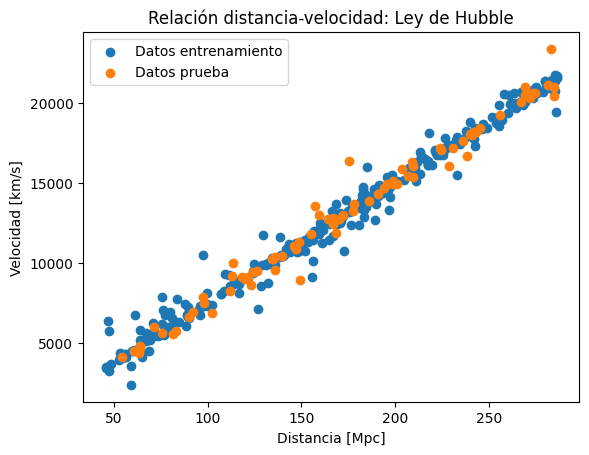

In [23]:
#plt.scatter(x, y, label='Datos simulados')
plt.scatter(x_train, y_train, label='Datos entrenamiento')
plt.scatter(x_test, y_test, label='Datos prueba')

plt.xlabel("Distancia [Mpc]")
plt.ylabel("Velocidad [km/s]")

plt.legend()
plt.title('Relación distancia-velocidad: Ley de Hubble')
plt.show()

## Modelo

In [12]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(x_train, y_train)

LinearRegression()

## Medir numericamente (Metricas)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# hacemos que el modelo prediga los valores de y_test
y_pred = model.predict(x_test)
y_pred[:5]

array([17162.91611256,  5810.77653327,  7033.47415289, 21297.81760063,
        4691.04597154])

In [17]:
y_test[:5]

array([16024.59414293,  5619.18996727,  6944.74692684, 20996.36283162,
        4499.37247557])

In [15]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 455788.2679567888
R^2 Score: 0.9813447009365585


# Plot resultados

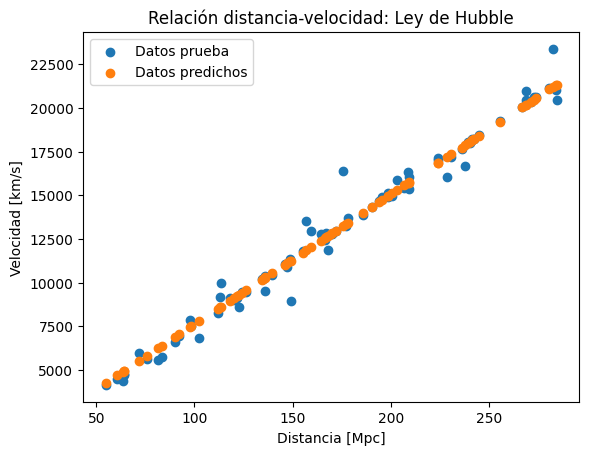

In [24]:

# datos prueba
plt.scatter(x_test, y_test, label='Datos prueba')
# predccion
plt.scatter(x_test, y_pred, label='Datos predichos')

plt.xlabel("Distancia [Mpc]")
plt.ylabel("Velocidad [km/s]")

plt.legend()
plt.title('Relación distancia-velocidad: Ley de Hubble')
plt.show()